Arquivo 'get_new_scores_results.json' carregado com sucesso.
--- Estatísticas (Valores Únicos) ---
Base Set:       6 valores únicos
LCA Base Set:   6 valores únicos
--------------------------------------
Gerando o Gráfico 1 (v2): Boxplot Comparativo de 5 caixas...


/tmp/ipykernel_1881/1078733243.py:78: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, vert=True, meanline=True, showmeans=True)


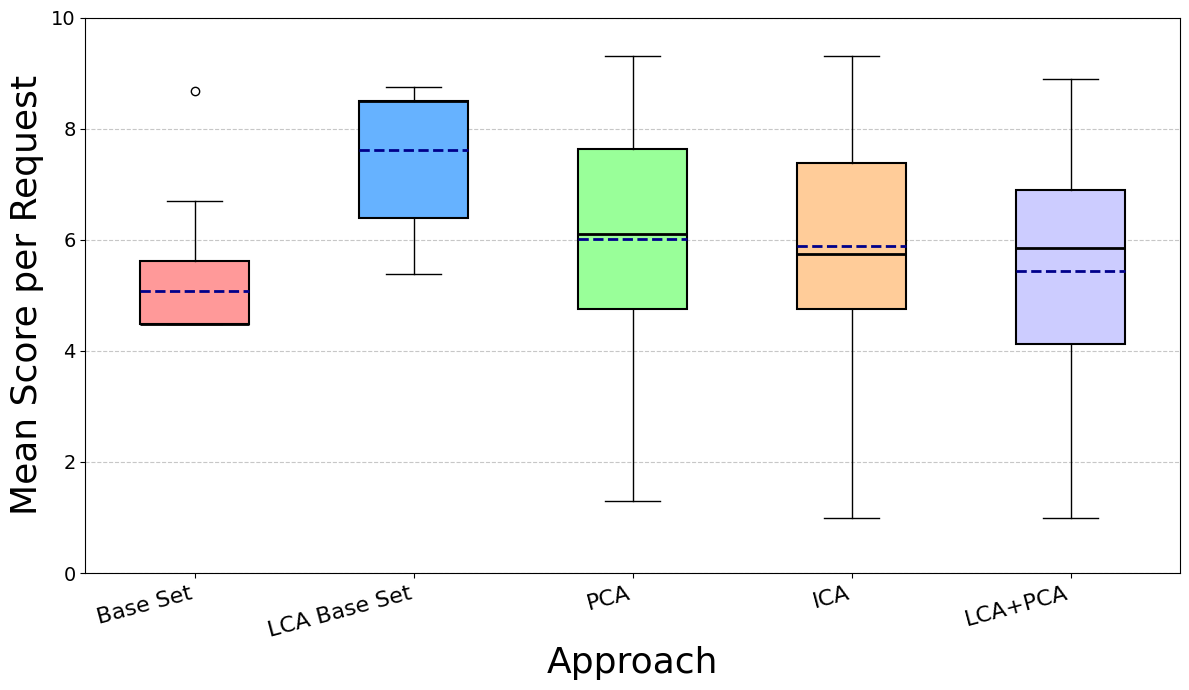

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

# --- 0. Garantir que o diretório de plots exista ---
output_dir = "plots_results"
os.makedirs(output_dir, exist_ok=True)

# --- 1. Carregar o Arquivo JSON ---
file_path = "get_new_scores_results.json" 
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"Arquivo '{file_path}' carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    data = None

if data:
    # --- 2. Preparar as Listas de Dados ---
    base_completa_scores = []
    base_elite_lca_scores = []  # <--- VAI SER UMA DISTRIBUIÇÃO
    pca_gerado_scores = []
    ica_gerado_scores = []
    lca_pca_gerado_scores = []
    
    # Iterar sobre cada pedido e coletar os scores
    for item in data:
        if item.get("pca") and item["pca"].get("base_mean_score") is not None:
            base_completa_scores.append(item["pca"]["base_mean_score"])
            
        # Vindo da chave 'lca_pca' - sabemos agora que é uma distribuição
        if item.get("lca_pca") and item["lca_pca"].get("base_mean_score") is not None:
            base_elite_lca_scores.append(item["lca_pca"]["base_mean_score"])
            
        # Gerados
        if item.get("pca") and item["pca"].get("mean_score") is not None:
            pca_gerado_scores.append(item["pca"]["mean_score"])
        if item.get("ica") and item["ica"].get("mean_score") is not None:
            ica_gerado_scores.append(item["ica"]["mean_score"])
        if item.get("lca_pca") and item["lca_pca"].get("mean_score") is not None:
            lca_pca_gerado_scores.append(item["lca_pca"]["mean_score"])

    # --- 3. Preparar Dados para o Gráfico ---
    
    # ***** MODIFICAÇÃO *****
    # Agrupar os dados para os boxplots (AGORA COM 5 CAIXAS)
    data_to_plot = [
        base_completa_scores, 
        base_elite_lca_scores, # <--- ADICIONADO DE VOLTA
        pca_gerado_scores, 
        ica_gerado_scores, 
        lca_pca_gerado_scores
    ]
    
    # Definir os rótulos do eixo X (AGORA COM 5 RÓTULOS)
    labels = [
        "Base Set", 
        "LCA Base Set", # <--- ADICIONADO DE VOLTA
        "PCA", 
        "ICA", 
        "LCA+PCA"
    ]
    
    # Imprimir estatísticas para provar
    print("--- Estatísticas (Valores Únicos) ---")
    print(f"Base Set:       {len(np.unique(base_completa_scores))} valores únicos")
    print(f"LCA Base Set:   {len(np.unique(base_elite_lca_scores))} valores únicos")
    print("--------------------------------------")


    # --- 4. Criar o Gráfico com Matplotlib ---
    print("Gerando o Gráfico 1 (v2): Boxplot Comparativo de 5 caixas...")
    
    fig, ax = plt.subplots(figsize=(12, 7)) # Tamanho ajustado para 5 caixas
    
    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, vert=True, meanline=True, showmeans=True)

    # --- 5. Customizar o Gráfico ---
    ax.set_ylabel('Mean Score per Request', fontsize=26, labelpad=5)
    ax.set_xlabel('Approach', fontsize=26)
    
    ax.set_ylim(0, 10) 
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Rotação para os 5 rótulos não se sobreporem
    plt.xticks(rotation=15, ha="right")
    
    # ***** MODIFICAÇÃO *****
    # Adicionar cores às caixas (AGORA 5 CORES)
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CCCCFF']
    for i, box in enumerate(bp['boxes']):
        box.set_facecolor(colors[i % len(colors)])
        box.set_edgecolor('black')
        box.set_linewidth(1.5)

    # Melhorar a aparência das medianas e médias
    for median in bp['medians']:
        median.set_color('black')
        median.set_linewidth(2)
        
    for mean in bp['means']:
        mean.set_color('darkblue') 
        mean.set_linestyle('--')
        mean.set_linewidth(2)

    plt.tight_layout()

    # --- 6. Salvar a Imagem ---
    output_filename_png = os.path.join(output_dir, "boxplot.png")
    output_filename_pdf = os.path.join(output_dir, "boxplot.pdf")
    plt.savefig(output_filename_png)
    plt.savefig(output_filename_pdf)
    
else:
    print("Não foi possível gerar o gráfico pois os dados não foram carregados.")

Arquivo 'get_new_scores_results.json' carregado com sucesso.

--- Médias Calculadas ---
Base Set: 5.0833
LCA Base Set: 7.6101
PCA: 6.0100
ICA: 5.8867
LCA+PCA: 5.4433
-------------------------

Gerando o Gráfico 2: Gráfico de Barras (Score Médio)...


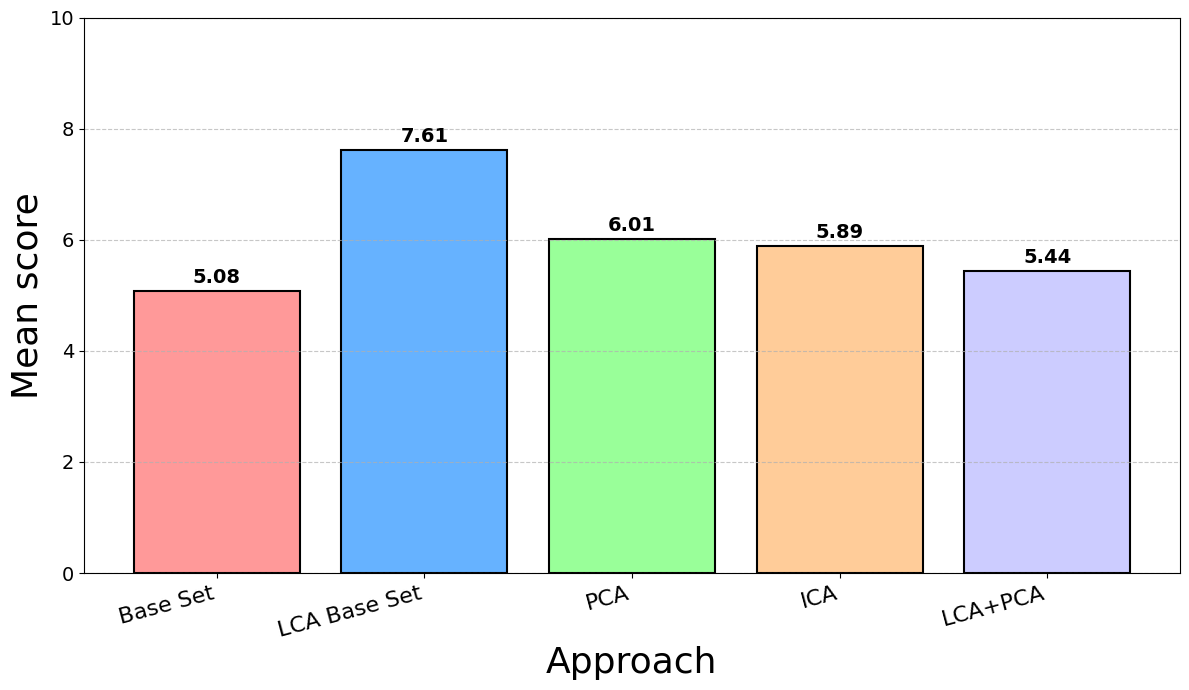

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

# --- 0. Garantir que o diretório de plots exista ---
output_dir = "plots_results"
os.makedirs(output_dir, exist_ok=True)

# --- 1. Carregar o Arquivo JSON ---
file_path = "get_new_scores_results.json" 
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"Arquivo '{file_path}' carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    data = None

if data:
    # --- 2. Preparar as Listas de Dados (Igual ao Gráfico 1) ---
    base_completa_scores = []
    base_elite_lca_scores = []
    pca_gerado_scores = []
    ica_gerado_scores = []
    lca_pca_gerado_scores = []
    
    for item in data:
        if item.get("pca") and item["pca"].get("base_mean_score") is not None:
            base_completa_scores.append(item["pca"]["base_mean_score"])
        if item.get("lca_pca") and item["lca_pca"].get("base_mean_score") is not None:
            base_elite_lca_scores.append(item["lca_pca"]["base_mean_score"])
        if item.get("pca") and item["pca"].get("mean_score") is not None:
            pca_gerado_scores.append(item["pca"]["mean_score"])
        if item.get("ica") and item["ica"].get("mean_score") is not None:
            ica_gerado_scores.append(item["ica"]["mean_score"])
        if item.get("lca_pca") and item["lca_pca"].get("mean_score") is not None:
            lca_pca_gerado_scores.append(item["lca_pca"]["mean_score"])

    # --- 3. Calcular as Médias para o Gráfico de Barras ---
    
    # Rótulos na mesma ordem do boxplot para consistência
    labels = [
        "Base Set", 
        "LCA Base Set",
        "PCA", 
        "ICA", 
        "LCA+PCA"
    ]
    
    # Calcular a média de cada lista
    mean_scores = [
        np.mean(base_completa_scores) if base_completa_scores else 0,
        np.mean(base_elite_lca_scores) if base_elite_lca_scores else 0,
        np.mean(pca_gerado_scores) if pca_gerado_scores else 0,
        np.mean(ica_gerado_scores) if ica_gerado_scores else 0,
        np.mean(lca_pca_gerado_scores) if lca_pca_gerado_scores else 0
    ]
    
    # Cores na mesma ordem do boxplot
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CCCCFF']

    print("\n--- Médias Calculadas ---")
    for label, mean in zip(labels, mean_scores):
        print(f"{label}: {mean:.4f}")
    print("-------------------------\n")
    
    # --- 4. Criar o Gráfico de Barras ---
    print("Gerando o Gráfico 2: Gráfico de Barras (Score Médio)...")
    
    fig, ax = plt.subplots(figsize=(12, 7))
    
    bars = ax.bar(labels, mean_scores, color=colors, edgecolor='black', linewidth=1.5)

    # --- 5. Customizar o Gráfico ---
    ax.set_ylabel('Mean score', fontsize=26)
    ax.set_xlabel('Approach', fontsize=26)
    
    ax.set_ylim(0, 10) 
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=14)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    plt.xticks(rotation=15, ha="right")
    
    # Adicionar o valor exato em cima de cada barra
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', # Texto a ser exibido (formatado com 2 casas decimais)
                    xy=(bar.get_x() + bar.get_width() / 2, height), # Posição (centro da barra, no topo)
                    xytext=(0, 3),  # 3 pontos de offset vertical para não colar no topo
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14, weight='bold')

    plt.tight_layout()

    # --- 6. Salvar a Imagem ---
    output_filename_png = os.path.join(output_dir, "grafico_de_barras_media.png")
    output_filename_pdf = os.path.join(output_dir, "grafico_de_barras_media.pdf")
    plt.savefig(output_filename_png)
    plt.savefig(output_filename_pdf)
    
else:
    print("Não foi possível gerar o gráfico pois os dados não foram carregados.")

Arquivo 'get_new_scores_results.json' carregado com sucesso.
Pontos coletados para PCA: 30
Pontos coletados para ICA: 30
Pontos coletados para LCA+PCA: 30
Gerando o Gráfico 3: Gráficos de Dispersão (Antes vs. Depois)...


/tmp/ipykernel_1881/884151087.py:96: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='upper left', fontsize=12)


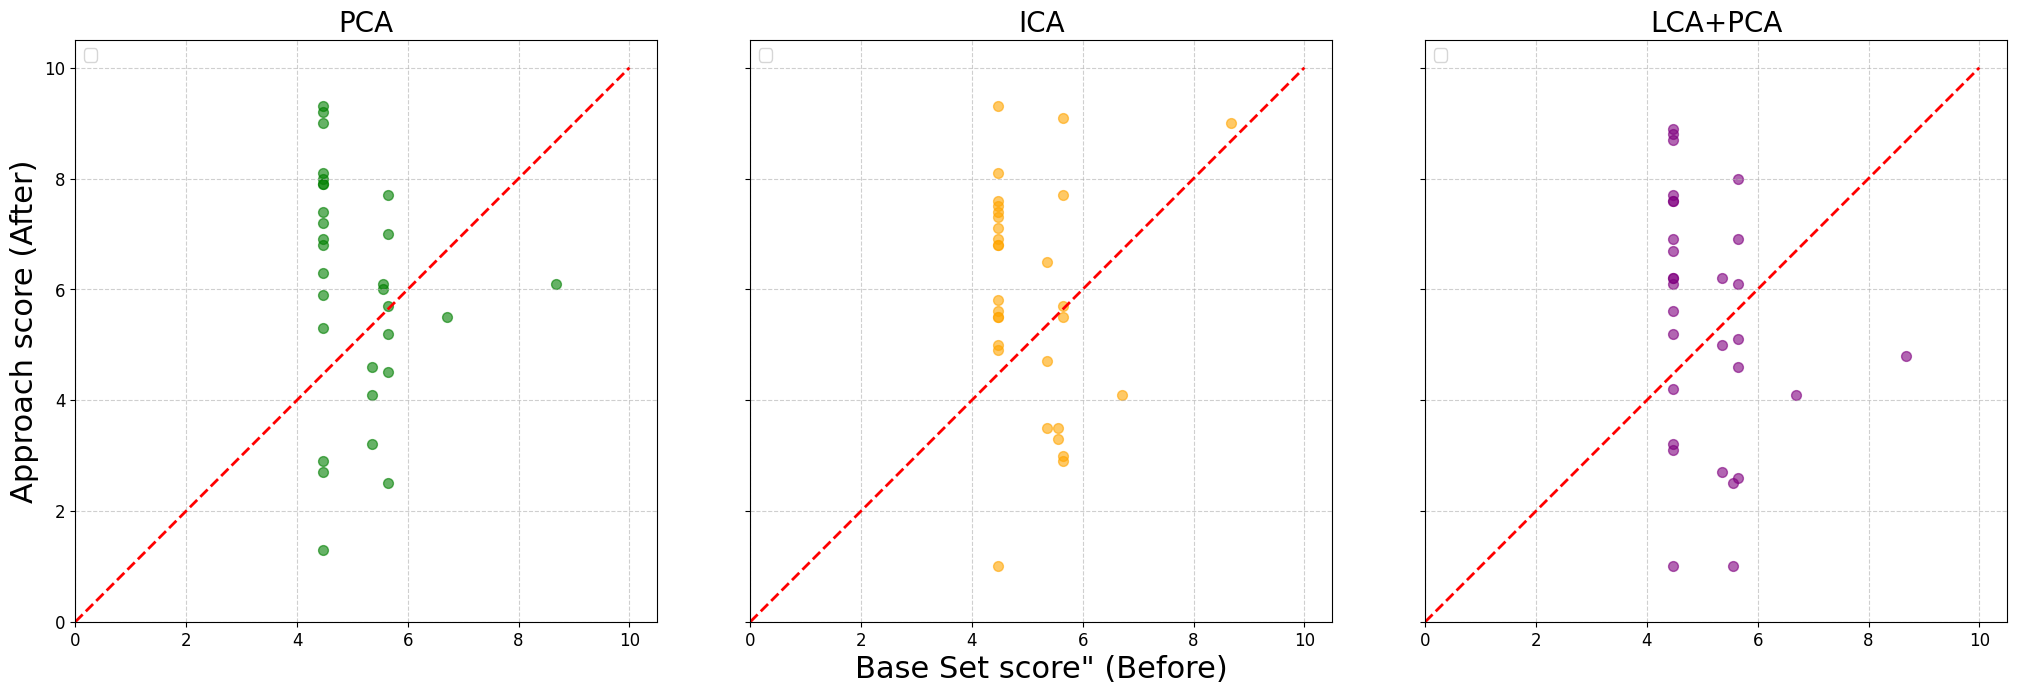

In [ ]:
import matplotlib.pyplot as plt
import json
import numpy as np
import os

# --- 0. Garantir que o diretório de plots exista ---
output_dir = "plots_results"
os.makedirs(output_dir, exist_ok=True)

# --- 1. Carregar o Arquivo JSON ---
file_path = "get_new_scores_results.json" 
try:
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    print(f"Arquivo '{file_path}' carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o JSON: {e}")
    data = None

if data:
    # --- 2. Preparar Listas de Dados para Dispersão ---
    
    # Para o PCA
    x_base_pca = []
    y_pca = []
    
    # Para o ICA
    x_base_ica = []
    y_ica = []
    
    # Para o LCA+PCA
    x_base_lca_pca = []
    y_lca_pca = []

    # Iterar e coletar pares (x, y)
    for item in data:
        # Usamos o "Base Set" (de "pca") como o Eixo X universal para comparação
        base_score = item.get("pca", {}).get("base_mean_score")
        
        if base_score is None:
            continue # Ignora pedidos sem um score base de referência
            
        # Coletar dados para o PCA
        pca_score = item.get("pca", {}).get("mean_score")
        if pca_score is not None:
            x_base_pca.append(base_score)
            y_pca.append(pca_score)
            
        # Coletar dados para o ICA
        ica_score = item.get("ica", {}).get("mean_score")
        if ica_score is not None:
            x_base_ica.append(base_score)
            y_ica.append(ica_score)
            
        # Coletar dados para o LCA+PCA
        lca_pca_score = item.get("lca_pca", {}).get("mean_score")
        if lca_pca_score is not None:
            x_base_lca_pca.append(base_score)
            y_lca_pca.append(lca_pca_score)

    print(f"Pontos coletados para PCA: {len(x_base_pca)}")
    print(f"Pontos coletados para ICA: {len(x_base_ica)}")
    print(f"Pontos coletados para LCA+PCA: {len(x_base_lca_pca)}")

    # --- 3. Criar os Gráficos de Dispersão ---
    print("Gerando o Gráfico 3: Gráficos de Dispersão (Antes vs. Depois)...")
    
    # Criar uma figura com 3 subplots (1 linha, 3 colunas)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7), sharex=True, sharey=True)
    
    #fig.suptitle('Comparação "Antes vs. Depois" (Score da Abordagem vs. Score do Base Set)', fontsize=24)
    
    # --- Gráfico 1: PCA ---
    ax1.scatter(x_base_pca, y_pca, alpha=0.6, s=50, color='g') # 'g' de green (#99FF99)
    ax1.set_title('PCA', fontsize=20)
    ax1.set_ylabel('Approach score (After)', fontsize=22)
    
    # --- Gráfico 2: ICA ---
    ax2.scatter(x_base_ica, y_ica, alpha=0.6, s=50, color='orange') # 'orange' (#FFCC99)
    ax2.set_title('ICA', fontsize=20)
    ax2.set_xlabel('Base Set score (Before)', fontsize=22)
    
    # --- Gráfico 3: LCA+PCA ---
    ax3.scatter(x_base_lca_pca, y_lca_pca, alpha=0.6, s=50, color='purple') # 'purple' (#CCCCFF)
    ax3.set_title('LCA+PCA', fontsize=20)

    # --- Configurações Comuns para todos os 3 gráficos ---
    for ax in [ax1, ax2, ax3]:
        # Desenhar a linha diagonal y=x
        ax.plot([0, 10], [0, 10], 'r--', linewidth=2)
        
        ax.set_xlim(0, 10.5)
        ax.set_ylim(0, 10.5)
        ax.grid(True, linestyle='--', alpha=0.6)
        ax.set_aspect('equal', 'box') # Garante que os eixos tenham a mesma escala
        ax.legend(loc='upper left', fontsize=12)
        
        ax.tick_params(axis='both', which='major', labelsize=12)


    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para o título principal

    # --- 4. Salvar a Imagem ---
    output_filename_png = os.path.join(output_dir, "dispersao_antes_depois.png")
    output_filename_pdf = os.path.join(output_dir, "dispersao_antes_depois.pdf")
    plt.savefig(output_filename_png)
    plt.savefig(output_filename_pdf)
    
else:
    print("Não foi possível gerar o gráfico pois os dados não foram carregados.")